<a href="https://colab.research.google.com/github/jparkgit/ESAA-23-2/blob/main/Week9_HW1_Regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[과제함](https://cafe.naver.com/esaa2019?iframe_url_utf8=%2FArticleRead.nhn%253Fclubid%3D29858915%2526page%3D1%2526menuid%3D80%2526boardtype%3DL%2526articleid%3D2441%2526referrerAllArticles%3Dfalse)

기한: 11월 3일 (금) 18시 30분

과제: 파이썬 머신러닝 완벽가이드 ch5. 1\~5 pg. 290\~319 필사하여 깃허브에 업로드하고, 깃허브 링크를 댓글로 달아주세요.

# 5. 회귀
(목차)
1. 회귀 소개
2. 단순 선형 회귀를 통한 회귀 이해
3. 비용 최소화 - Gradient Descent
4. Scikitrun LinearRegression 을 이용한 보스턴 주택 가격 예측
5. 다항 회귀와 과(대)적합/과소적합 이해
---
6. 규제 선형 모델 - ridge, lasso, elasticnet
7. Logistic regression
8. 회귀 트리
9. 회귀 실습 - 자전거 대여 수요 예측
10. 회귀 실습 - 캐글 주택 가격: 고급 회귀 기법
11. 정리

## 5.1 회귀 소개

<지도학습의 두 가지 유형>
* 분류: 예측값이 category값 (이산)
* 회귀: 예측값이 숫자값 (연속)


<회귀 유형 구분>\
독립변수의 개수
* 1 개: 단일 회귀
* 여러 개: 다중 회귀

회귀 계수의 결합
* 선형 (regularization 방법에 따라 유형 나뉨)
  * 일반 선형 회귀: RSS 최소화, 규제 적용 X
  * Ridge
  * Lasso
  * ElasticNet
  * Logistic Reg
* 비선형

## 5.2 단순 선형 회귀를 통한 회귀 이해

전체 데이터의 오류의 합 구하는 방식
* 절댓값을 취해서 합: Mean Absolute Error
* 오류 값의 제곱을 구해서 합: RSS (Residual Sum of Squares)

일반적으로 계산의 편리를 위해 RSS 방식 이용\
RSS를 최소로하는 회귀 계수를 학습을 통해 찾는 것이 머신러닝 기반 회귀의 핵심\
RSS의 중심변수는 회귀식의 독립변수 X, 종속변수 Y도 아닌 회귀계수 $w$ 이다\
RSS = Error$^2$ = 비용 함수 = 손실 함수 (Cost/loss function)

\

$RSS(w_{0}, w_{1})=\frac{1}{N}\sum_{i=1}^{N}(y_{i}-(w_{0} + w_{1}*x_{i}))^2$\

\


## 5.3 비용 최소화 - Gradient Descent

Gradient Descent 의 핵심: 오류가 작아지는 방향으로 W 값을 보정

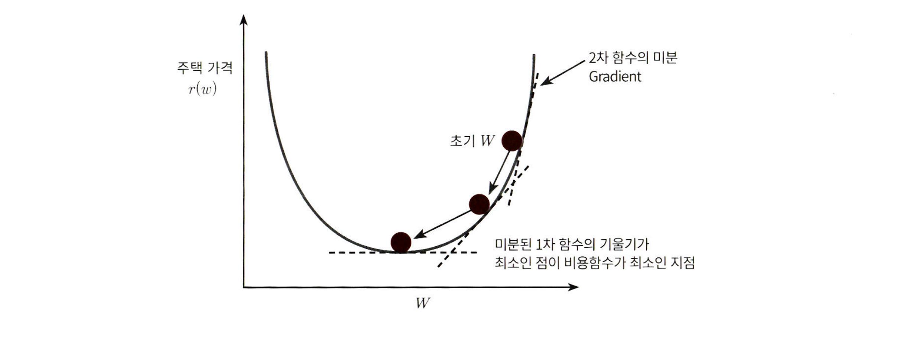

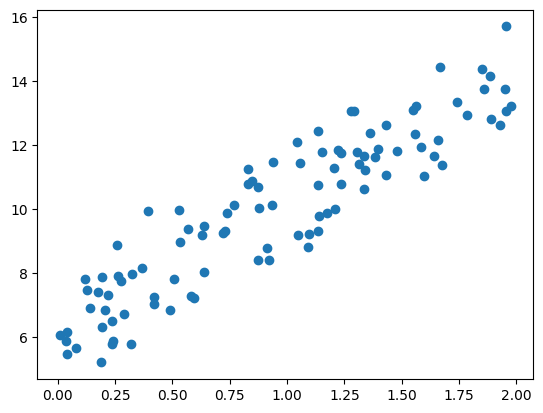

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4x+6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2 *np.random.rand(100, 1)
y = 6 + 4 *X + np.random.randn(100,1)

#X, y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

Cost function

In [2]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred))/N
  return cost

get_weight_updates() 함수

In [3]:
# w1과 w0를 업데이트 할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
  N = len(y)
  #먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  # 예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred = np.dot(X, w1.T) + w0
  diff = y- y_pred

  #w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N, 1))

  #w1과 w0을 업데이트할 w1_update와 w0_update 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

gradient_descent_steps() 함수:


get_weight_updates() 을 gradient descent 방식으로 반복적으로 수행하여 w1과 w0를 업데이트 하는 함수

In [5]:
# 입력인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용
def gradient_descent_steps(X, y, iters=10000):
  #w0와 w1을 모두 0으로 초기화
  w0 = np.zeros((1, 1))
  w1 = np.zeros((1, 1))

  #인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
  for ind in range(iters):
    w1_update , w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

    return w1, w0

최종적으로 예측값과 실제값의 RSS 차이를 계산하는 get_cost() 함수\
gradient descent 방법의 예측 오류 계산

In [9]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:")
print(w1[0, 0])
print("w2:")
print(w0[0, 0])

y_pred = w1[0,0] * X + w0
print('\nGradient Descent Total Cost:')
print(get_cost(y, y_pred))

w1:
0.2150268139164703
w2:
0.19949370120354534

Gradient Descent Total Cost:
97.29699213674446


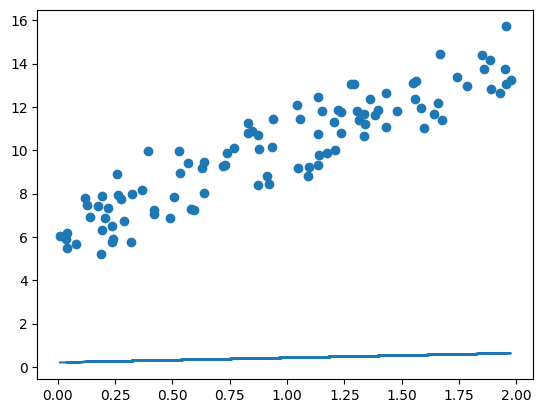

In [10]:
plt.scatter(X, y)
plt.plot(X, y_pred)

stochastic_gradient_descent_steps() 함수:\
(미니 배치) 확률적 gradient descent

In [11]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0

    for ind in range(iters):
        np.random.seed(ind)
        # 차이점: 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

w1, w0 및 예측 오류 비용 계산

In [12]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:", round(w1[0,0], 3), "w0:", round(w0[0,0], 3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


예측 성능상의 큰 차이가 없음.\
따라서 큰 데이터를 처리할 때는 gradient descent 는 시간이 오래 걸리므로 일반적으로 stochastic gradient descent법을 이용함

## 5.4 Scikitrun LinearRegression 을 이용한 보스턴 주택 가격 예측
1. LinearRegression 클래스 - Ordinary Least Squares
2. 회귀 평가 지표
3. LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

### 5.4.1 LinearRegression 클래스 - Ordinary Least Squares

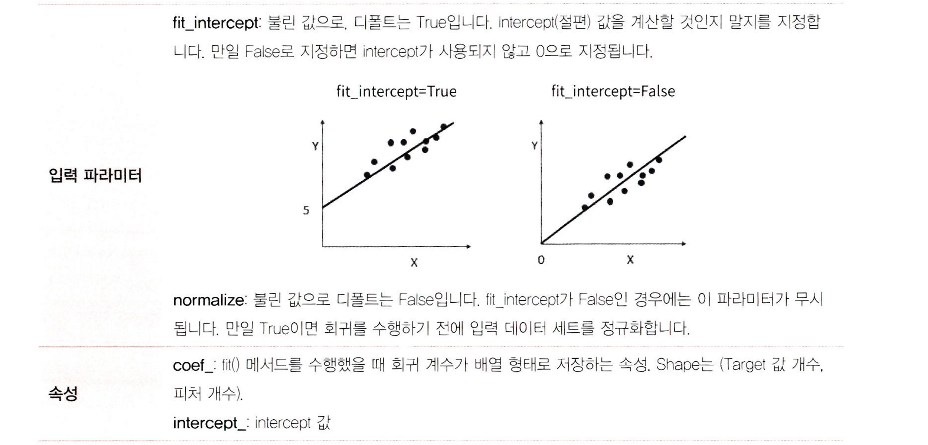

### 5.4.2 회귀 평가 지표

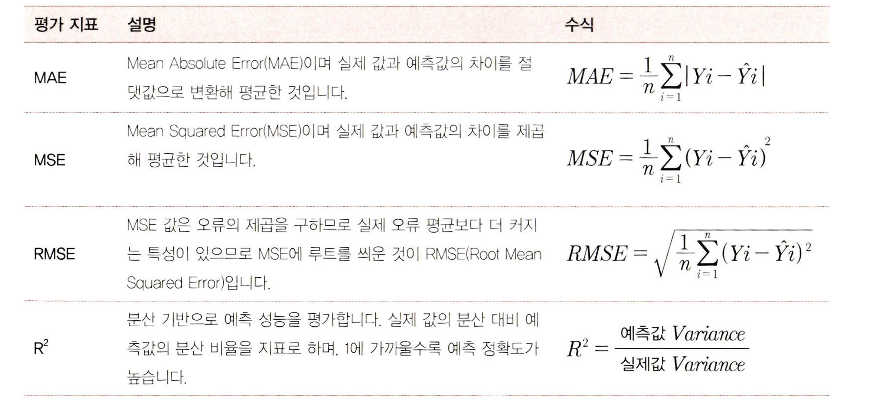

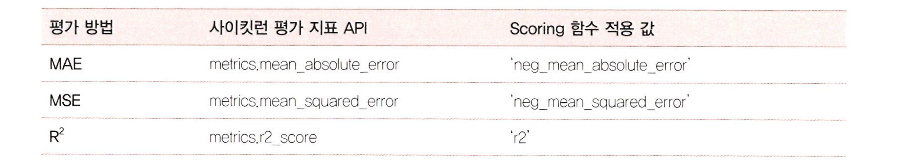

`cross_val_score`, `GridSearchCV`와 같은 scoring 함수에 회귀 평가ㅏ 지표를 적용할 때 유의할 점:\
`neg_mean_absolute_error` 같이 앞에 neg가 붙은 거는 -1 * `metrics.mean_absolute_error` 이니 주의해야 함\
score 비교할 때 대소관계가 반대로 될 수 있음
* 사이킷런의 scoring 함수: score 값이 클수록 좋은 평가 결과로 자동 평가
* 실제값과 예측값의 차이 (오류)를 기반으로 하는 회귀 평가 지표의 경우 값이 클수록 나쁜 모델인 것이므로 이를 사이킷런의 scoring 함수에 일반적으로 반영하려면 -1를 곱해 보정이 필요한 것

### 5.4.3 LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

ImportError:
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

In [25]:
!pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.6/774.6 kB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 61.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 58.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=f61bdd6972380291e7eb0c03732a9891ccca13052d1c2d6d0ab5c2c3a93fb2ea
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
from ISLP import load_data

In [6]:
bostonDF = load_data("Boston")
bostonDF.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [7]:
bostonDF.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                    'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'PRICE']
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [8]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  PRICE    506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


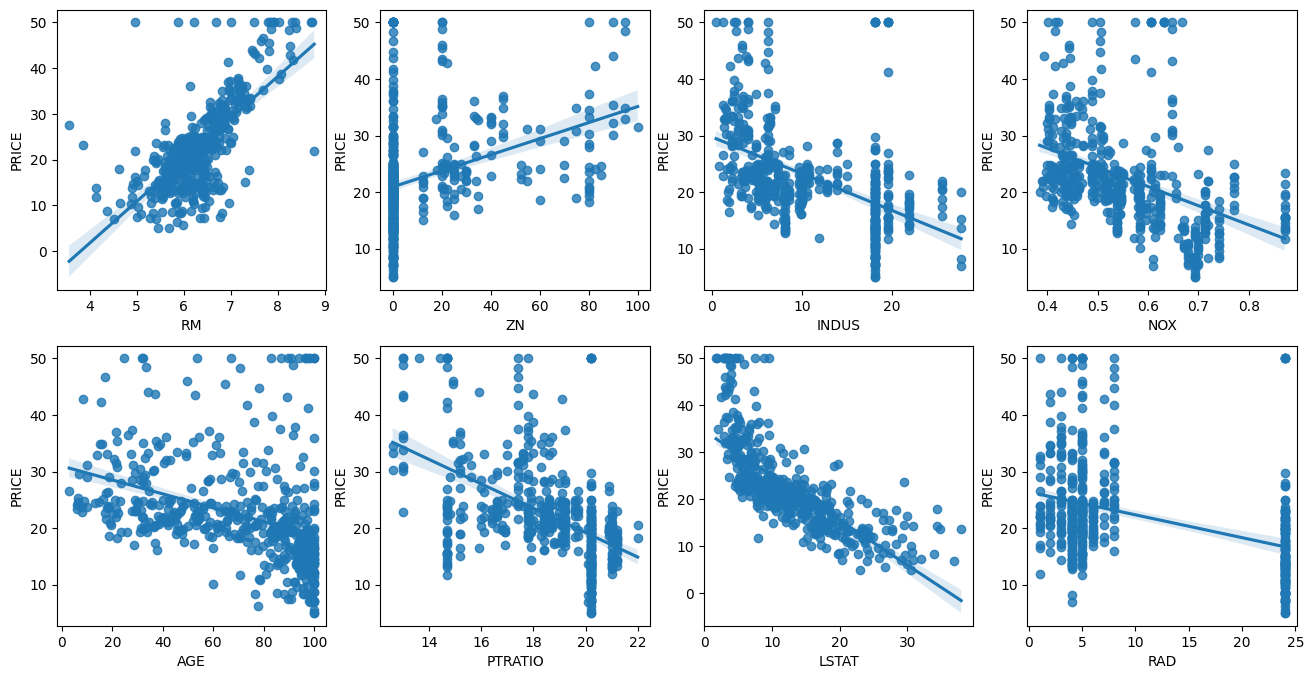

In [11]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
  row = int(i/4)
  col = i%4
  # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현.
  sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

RM과 LSTAT의 PRICE 영향도가 가장 두드러짐\
* RM: positive linearity
* LSTAT: negative

metrics 모듈의 `mean_squared_error()`, `r2_score()` API 이용해 MSE 와 R2 score 측정

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행.
lr=LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE:{0:.3f}, RMSE: {1:.3f}'.format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE:17.631, RMSE: 4.199
Variance score: 0.753


LinearRegression으로 생성한 모델의 절편과 회귀 계수값 보기

In [13]:
print('절편 값:', lr.intercept_)
print('회귀 계수 값:', np.round(lr.coef_, 1))

절편 값: 46.16569860896084
회귀 계수 값: [ -0.2   0.1   0.    3.2 -20.9   3.3   0.   -1.8   0.4  -0.   -0.9  -0.6]


* coef_ 속성을 회귀 계수값만 가지고 있으므로 이를 피처별 회귀 계수 값으로 다시 매핑
* 높은 값 순으로 출력

In [14]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성, 인덱스 칼럼명에 유의
coeff=pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.3
CHAS        3.2
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
CRIM       -0.2
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.8
NOX       -20.9
dtype: float64

RM이 양의 값으로 회귀 계수가 가장 크며\
NOX의 음의 값이 너무 커보임


5개의 폴드 세트에서 cross_val_score() 이용해 CV로 MSE와  RMSE를 측정하기\

* cross_val_score()은 RMSE를 제공하지 않기 때문에 MSE 결과를 RMSE로 변환해줘야함
* cross_val_score의 인자로 `scoring = 'neg_mean_sqaured_error'`를 지정하면 음수값이 반환되는데 회귀는 MSE 값이 낮을 수록 좋은 회귀 모델이기 때문에 계산된 MSE 값에 -1를 곱해서 반환함
* 따라서 cross_val_score()에서 반환된 값(음수MSE)에 -1를 곱해야 원래 양의 MSE 값이 된다. 그리고 거기에 루트를 해줘서 RMSE를 구한다

In [15]:
from sklearn.model_selection import cross_val_score

y_taret = bostonDF["PRICE"]
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = 'neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-12.53 -26.45 -34.34 -77.07 -30.75]
5 folds의 개별 RMSE scores:  [3.54 5.14 5.86 8.78 5.54]
5 folds의 평균 RMSE: 5.773


## 5.5 다항 회귀와 과적합/과소적합 이해
1. 다항 회귀 이해
2. 다항 회귀를 이용한 과적합/과소적합 이해
3. Bias-Variance Trade-off

### 5.5.1 다항 회귀 이해

사이킷런은 PolynomialFeatures 클래스를 통해 피처를 polynomial 피처롤 변환함\

In [16]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [17]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [18]:
# 3 차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


피처 변환과 선형 회귀 적용을 별도로 하는 것보다\
사이킷런의 Pipeline 객체를 이용해 한번에 다항 회귀를 구현하는 것이 더 나음

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 5.5.2 다항 회귀를 이용한 과적합/과소적합 이해

[Scikit-learn: Underfitting vs Overfitting](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환값을 반환.
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun() 에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03899000e+05 -1.87416100e+06  2.03716220e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006024e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE 는 181238256.56 입니다.


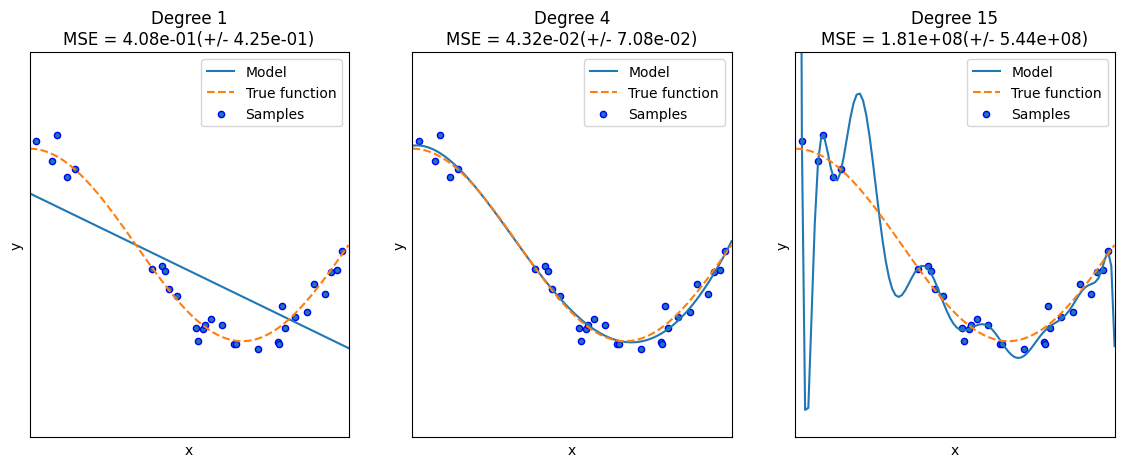

In [22]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)

    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))

    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")

    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

### 5.5.3 Bias-Variance Trade-off

bias와 variance가 trade off를 이루면서 오류 cost값이 최대로 낮아지는 모델을 구축해야 함

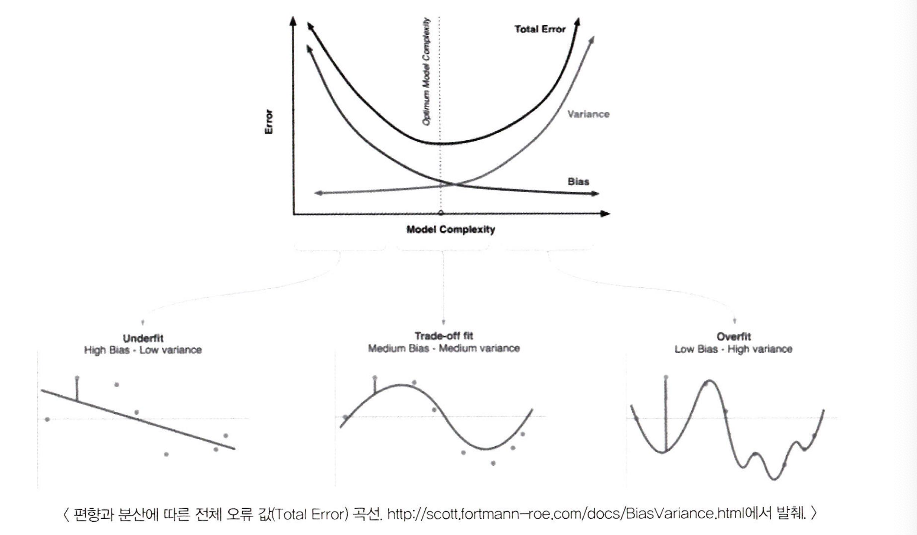